Notebook to perform K-Means clustering of calcium activity data in a time series
Created by: Michael Martin
Date: April 04, 2020

Outline of the plan is:

import modules

get path to data & get kept ROIs

store data in a way that is accesible

PCA for dimensionality reduction while retaining ROI identities

K means clustering on lower dimensionality data

save/plot clustered data

In [10]:
import os 
import csv
# import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.preprocessing
import sklearn.decomposition #for PCA

pca = sklearn.decomposition.PCA(n_components=2)

File path to data

In [11]:
main_path  = 'C:/Users/mmart/Documents/Analysis/Mar.5.20_HUC6f_8dpf_WFtoBF_1D-s5/'
roi_path   = main_path+"roi_data.npy"
rois = np.load(roi_path, allow_pickle=True)
# tail_path  = main_path+"Mar.10.20_2C_tail_angles1.csv"
# video_path = main_path+"Mar.10.20_HUC6f_fish2_6dpf_loom_lv30_2C-1_mc_ALL.tif"

In [12]:
temporal_footprints   = rois[()]['roi_temporal_footprints']
temp_residuals        = rois[()]['roi_temporal_residuals']
spatial_footprints    = rois[()]['roi_spatial_footprints']
bg_temp_footprints    = rois[()]['bg_temporal_footprints']
bg_spatial_footprints = rois[()]['bg_spatial_footprints']
removed_rois          = rois[()]['all_removed_rois']

kept_rois = [ i for i in range(temporal_footprints[0].shape[0]) if i not in removed_rois[0]] #only a single plane to start
# myst_vals = rois[()]
# print(myst_vals)
# print(temporal_footprints)

kept_temporal_footprints = temporal_footprints[0][kept_rois]
# roi_spatial_footprints = spatial_footprints[0].transpose()
# roi_spatial_footprints = spatial_footprints[0].toarray().reshape((video.shape[2], video.shape[3], spatial_footprints[z].shape[-1])).transpose((0, 1, 2))



In [13]:
# temporal_footprints[0].shape
print(temporal_footprints[0].shape)
kept_temporal_footprints = temporal_footprints[0][kept_rois]
print(kept_temporal_footprints.shape)
print(kept_rois)
# print(roi_spatial_footprints[0].shape)
# kept_roi_spatial_footprints = roi_spatial_footprints[0][kept_rois]
# transposed_spatial = kept_roi_spatial_footprints.transpose()
# # print(kept_roi_spatial_footprints.shape)
# print(transposed_spatial.shape)

(80, 110)
(19, 110)
[0, 1, 2, 3, 4, 6, 7, 9, 12, 13, 15, 24, 26, 29, 30, 33, 40, 49, 63]


In [14]:
#Scale data before performing PCA
scaled_data = sklearn.preprocessing.scale(kept_temporal_footprints)
numeric_data = pd.DataFrame(scaled_data)

#Perform PCA
pca = sklearn.decomposition.PCA(n_components=3)
principal_components = pca.fit_transform(numeric_data)


In [15]:
type(principal_components)
principal_components.shape

(19, 3)

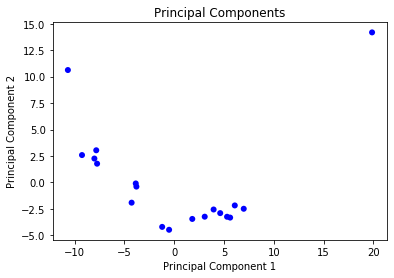

In [7]:
from matplotlib.colors import ListedColormap
x = principal_components[:,0]
y = principal_components[:,1]

plt.title("Principal Components")
plt.scatter(x, y, color = 'blue', edgecolors = 'none')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [16]:
n_clusters = 5
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters) # n=3 is arbitrary, will perform other calculations to figure it out
clustered_data = kmeans.fit(principal_components)

In [17]:
# print(clustered_data)
labelled_clusters = kmeans.labels_
print(labelled_clusters)
print(type(labelled_clusters[0]))
print(type(kept_rois[0]))
print(kept_rois)

[4 4 3 4 4 2 1 1 1 1 0 0 1 0 0 0 0 0 0]
<class 'numpy.int32'>
<class 'int'>
[0, 1, 2, 3, 4, 6, 7, 9, 12, 13, 15, 24, 26, 29, 30, 33, 40, 49, 63]


In [31]:
# kMeans_groups = []
# for cluster_num in range(len(n_clusters)):
#     demoList{cluster_num}
    
    
# for i in range(len(kept_rois)):
#     if
    
grouped_KMeans_dict = {}
for label, roi_num in zip(labelled_clusters, kept_rois):
    if label not in grouped_KMeans_dict:
        grouped_KMeans_dict[label] = str(roi_num)#list(roi_num)
    else:
        grouped_KMeans_dict[label] = grouped_KMeans_dict[label] + ',' + str(roi_num)#list(roi_num)

# grouped_KMeans_dict = {}
# for label, roi_num in zip(labelled_clusters, kept_rois):
#     if label not in grouped_KMeans_dict:
#         grouped_KMeans_dict[label] = list(str(roi_num))#list(roi_num)
#         print(roi_num)
#     else:
# #         print(label)
#         pass
# #         grouped_KMeans_dict[label] = grouped_KMeans_dict[label] + ',' + str(roi_num)#list(roi_num)

In [32]:
grouped_KMeans_dict

{4: '0,1,3,4', 3: '2', 2: '6', 1: '7,9,12,13,26', 0: '15,24,29,30,33,40,49,63'}

In [26]:
for cluster_num in range(5):
    demoList{}.format(cluster_num) = []
    for i in range(3):
        demoList{}.format(cluster_num) += i

SyntaxError: invalid syntax (<ipython-input-26-418e3ae4e772>, line 2)

In [ ]:
#THIS CELL IS TAKEN FROM THE EDX HOMEWORK, TWO CELLS PUT INTO 1
#THIS WILL BE REMOVED BEFORE GOING PUBLIC, I JUST WANTED TO
#KEEP IT SO I DIDN'T HAVE TO LOOK UP pca AND knn EVERY TIME
#I WANTED TO REFERENCE THEIR USE. 

import sklearn.preprocessing
scaled_data = sklearn.preprocessing.scale(numeric_data)
numeric_data = pd.DataFrame(scaled_data, columns = numeric_data.columns)

import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)

principal_components.shape

#///////////////////

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])
# Enter your code here!

library_predictions = knn.predict(numeric_data)

print(accuracy(library_predictions, data['high_quality']))

In [ ]:
https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py 
https://scikit-learn.org/stable/modules/clustering.html#k-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/decomposition.html#pca
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [11]:
d = {'key1':[], 'key2': []}
d['key1'].append('hello')
d['key2'].append('world')
print(d)

{'key1': ['hello'], 'key2': ['world']}


In [12]:
d['key1'].append('and')
d['key1'].append('goodbye')
print(d)

{'key1': ['hello', 'and', 'goodbye'], 'key2': ['world']}


In [13]:
d['key2'] = 100
print(d)

{'key1': ['hello', 'and', 'goodbye'], 'key2': 100}


In [11]:
list1 = ['a','b','c','d','e','f','g','h','i','j']
class_list = [0,1,2,1,0,3,0,1,1,3]
j = 0
test_dict = {}
# for i in class_list:
#     if i not in test_dict:
#         print(type(test_dict))
#         test_dict[i] = list1[j]
#         j += 1
#     else:
#         test_dict[i] = list1[j]
#         j +=1
        
        
total = {}
for k, v in zip(list1, class_list):
    if v not in total:
        total[v] = list(k)
    else:
        total[v] = total[v] + list(k)

        


In [12]:
total

{0: ['a', 'e', 'g'], 1: ['b', 'd', 'h', 'i'], 2: ['c'], 3: ['f', 'j']}

In [18]:
print(total[1])

['b', 'd', 'h', 'i']


In [ ]:
roi_num = [1,2,34,5,67,890]